# FIFA 19 Players - Visualizations
This project will examine the various characteristics of players in the FIFA '19 player list.
I will look at a few of the different player attributes represented in the data:
 - Nationality
 - Position
 - Value & Wage
 - Liverpool Players (my favorite team!)
 - American Players (The Sport of the Future since 1990)

__INDEX__

I. [Libraries and a bit of cleaning - Feel free to skip this section](#I.-Import-libraries,-load-data,-and-do-a-tiny-bit-of-cleaning)

II. [Visualize It - Countries in FIFA '19](#II.-Visualize-It---Countries)

III. [Visualize It - Positions](#III.-Visualize-It---Positions)

IV. [Visualize It - Player Values & Wages](#IV.-Visualize-It---Player-Value-&-Wage)

V. [YNWA - Liverpool](#V.-YNWA---Liverpool-Players)

## I. Import libraries, load data, and do a tiny bit of cleaning

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
# Load DataFrame
pd.set_option('display.max_columns', None)
path = '/home/tdraths/sb_assignments/Visualization_Project/data.csv'
players = pd.read_csv(path, index_col=0)
players.sample(8)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
7480,200922,S. Schipplock,29,https://cdn.sofifa.org/players/4/19/200922.png,Germany,https://cdn.sofifa.org/flags/21.png,68,68,DSC Arminia Bielefeld,https://cdn.sofifa.org/teams/2/light/159.png,€900K,€7K,1725,Right,2.0,3.0,3.0,High/ Medium,Normal,No,ST,36.0,"Jul 3, 2018",NaN,2021,6'1,185lbs,67+2,67+2,67+2,64+2,65+2,65+2,65+2,64+2,62+2,62+2,62+2,63+2,58+2,58+2,58+2,63+2,54+2,53+2,53+2,53+2,54+2,52+2,52+2,52+2,52+2,52+2,62.0,61.0,71.0,63.0,70.0,63.0,53.0,47.0,40.0,68.0,66.0,69.0,62.0,68.0,51.0,76.0,77.0,78.0,80.0,59.0,81.0,42.0,67.0,58.0,59.0,62.0,40.0,30.0,27.0,8.0,7.0,9.0,7.0,6.0,€1.4M
6741,230178,Fredinho Mutto,26,https://cdn.sofifa.org/players/4/19/230178.png,Brazil,https://cdn.sofifa.org/flags/54.png,68,68,Bahia,https://cdn.sofifa.org/teams/2/light/1598.png,€750K,€5K,1732,Left,1.0,2.0,2.0,Medium/ Medium,Normal,No,LB,14.0,"Jan 1, 2018",NaN,2021,5'10,172lbs,54+2,54+2,54+2,57+2,55+2,55+2,55+2,57+2,57+2,57+2,57+2,59+2,61+2,61+2,61+2,59+2,66+2,67+2,67+2,67+2,66+2,67+2,65+2,65+2,65+2,67+2,67.0,44.0,57.0,69.0,48.0,45.0,68.0,55.0,76.0,60.0,68.0,74.0,64.0,68.0,57.0,44.0,44.0,67.0,63.0,55.0,87.0,73.0,49.0,47.0,40.0,64.0,66.0,56.0,75.0,7.0,13.0,9.0,8.0,9.0,€1.4M
14389,235422,Chico,27,https://cdn.sofifa.org/players/4/19/235422.png,Korea Republic,https://cdn.sofifa.org/flags/167.png,61,62,Pohang Steelers,https://cdn.sofifa.org/teams/2/light/1474.png,€280K,€2K,1568,Right,1.0,3.0,2.0,Medium/ Low,Lean,No,CM,8.0,"Jan 5, 2018",NaN,2021,5'9,152lbs,55+2,55+2,55+2,56+2,58+2,58+2,58+2,56+2,59+2,59+2,59+2,58+2,60+2,60+2,60+2,58+2,55+2,56+2,56+2,56+2,55+2,54+2,49+2,49+2,49+2,54+2,43.0,48.0,46.0,62.0,44.0,57.0,46.0,49.0,62.0,60.0,63.0,60.0,57.0,61.0,59.0,65.0,39.0,78.0,55.0,62.0,42.0,53.0,54.0,62.0,52.0,58.0,45.0,47.0,48.0,7.0,11.0,12.0,12.0,7.0,€371K
5477,208335,L. Kübler,25,https://cdn.sofifa.org/players/4/19/208335.png,Germany,https://cdn.sofifa.org/flags/21.png,70,72,SC Freiburg,https://cdn.sofifa.org/teams/2/light/25.png,€1.8M,€12K,1740,Right,1.0,3.0,2.0,Medium/ Medium,Lean,No,RB,17.0,"Jul 1, 2015",NaN,2020,6'0,161lbs,56+2,56+2,56+2,58+2,56+2,56+2,56+2,58+2,56+2,56+2,56+2,60+2,58+2,58+2,58+2,60+2,68+2,66+2,66+2,66+2,68+2,68+2,69+2,69+2,69+2,68+2,67.0,44.0,63.0,66.0,50.0,59.0,46.0,27.0,53.0,64.0,67.0,68.0,65.0,67.0,67.0,55.0,73.0,67.0,62.0,43.0,75.0,71.0,46.0,45.0,60.0,60.0,71.0,72.0,74.0,12.0,14.0,11.0,8.0,8.0,€3.3M
9711,237779,T. Yamashita,30,https://cdn.sofifa.org/players/4/19/237779.png,Japan,https://cdn.sofifa.org/flags/163.png,66,66,Cerezo Osaka,https://cdn.sofifa.org/teams/2/light/101148.png,€475K,€3K,1422,Right,1.0,2.0,2.0,Low/ High,Lean,No,LCB,23.0,"Jan 1, 2012",NaN,2021,6'0,161lbs,44+2,44+2,44+2,41+2,41+2,41+2,41+2,41+2,40+2,40+2,40+2,44+2,44+2,44+2,44+2,44+2,60+2,57+2,57+2,57+2,60+2,62+2,64+2,64+2,64+2,62+2,43.0,21.0,67.0,55.0,27.0,26.0,29.0,24.0,21.0,56.0,60.0,65.0,60.0,62.0,62.0,55.0,76.0,81.0,73.0,21.0,49.0,65.0,22.0,28.0,31.0,53.0,64.0,70.0,61.0,7.0,10.0,7.0,14.0,10.0,€594K
13074,228610,O. Muzayil,25,https://cdn.sofifa.org/players/4/19/228610.png,Saudi Arabia,https://cdn.sofifa.org/flags/183.png,62,64,Al Ittihad,https://cdn.sofifa.org/teams/2/light/607.png,€300K,€5K,1569,Right,1.0,2.0,2.0,Medium/ Medium,Lean,No,RB,32.0,"Aug 8, 2016",NaN,2019,5'8,134lbs,49+2,49+2,49+2,54+2,52+2,52+2,52+2,54+2,53+2,53+2,53+2,57+2,54+2,54+2,54

In [3]:
players.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [4]:
players.shape

(18207, 88)

In [5]:
players.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.

In [6]:
players.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

A lot of players to work with here! And a lot of columns. Not a lot of null values, but a few. I need to do a few things to tidy things up:
- The `Value` and `Wage` columns need to be converted into floats.
- There are a lot of position-related columns in the middle of the DataFrame that correspond to a player's rating at that position. I'm really only interested in the actual `players['position']` column.
- I'll subset `players` into something more manageable, using only columns I want to work with.

First, I'll take care of `Value` and `Wage`.

In [7]:
def convert_values(Value):
    amount = Value.replace('€', '')
    if 'M' in amount:
        amount = float(amount.replace('M', ''))*1000000
    elif 'K' in amount:
        amount = float(amount.replace('K', ''))*1000
    return float(amount)

players['Value'] = players['Value'].apply(lambda Value: convert_values(Value))
players['Wage'] = players['Wage'].apply(lambda Wage: convert_values(Wage))

In [8]:
# A lot of columns to sift through, so will just make them all lowercase.
players.columns = players.columns.str.strip().str.lower()
players.columns

Index(['id', 'name', 'age', 'photo', 'nationality', 'flag', 'overall',
       'potential', 'club', 'club logo', 'value', 'wage', 'special',
       'preferred foot', 'international reputation', 'weak foot',
       'skill moves', 'work rate', 'body type', 'real face', 'position',
       'jersey number', 'joined', 'loaned from', 'contract valid until',
       'height', 'weight', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',
       'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'crossing',
       'finishing', 'headingaccuracy', 'shortpassing', 'volleys', 'dribbling',
       'curve', 'fkaccuracy', 'longpassing', 'ballcontrol', 'acceleration',
       'sprintspeed', 'agility', 'reactions', 'balance', 'shotpower',
       'jumping', 'stamina', 'strength', 'longshots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure',
       'marking', 'standingtackle', 'slidingtackle', 'gkdiv

In [9]:
# Keeping just columns that I want to work with.
# Not every position-related or rating-related column will be used in this visualization project.

columns_to_use = [
    'id', 'name', 'age', 'nationality', 'overall', 'potential', 'club', 'value', 'wage', 
    'preferred foot', 'international reputation', 'work rate', 'position', 'crossing', 
    'finishing', 'shortpassing', 'dribbling', 'fkaccuracy', 'longpassing', 'sprintspeed', 
    'stamina', 'strength', 'longshots', 'aggression', 'interceptions', 'penalties']

players = players[columns_to_use]
players.sample(4)

,id,name,age,nationality,overall,potential,club,value,wage,preferred foot,international reputation,work rate,position,crossing,finishing,shortpassing,dribbling,fkaccuracy,longpassing,sprintspeed,stamina,strength,longshots,aggression,interceptions,penalties
12322,203842,M. Fitzgerald,29,Japan,63,63,Kawasaki Frontale,290000.0,2000.0,Right,1.0,Medium/ Medium,CB,51.0,37.0,56.0,45.0,29.0,54.0,59.0,66.0,87.0,45.0,64.0,58.0,33.0
1422,222357,B. Embolo,21,Switzerland,76,86,FC Schalke 04,12500000.0,24000.0,Right,2.0,Medium/ Medium,ST,59.0,74.0,72.0,78.0,51.0,70.0,79.0,71.0,83.0,62.0,63.0,41.0,66.0
1035,206198,D. Heintz,24,Germany,77,79,SC Freiburg,9000000.0,20000.0,Left,2.0,Medium/ Medium,LCB,51.0,23.0,72.0,58.0,32.0,70.0,68.0,69.0,83.0,56.0,70.0,75.0,41.0
10630,222639,R. Ramírez,21,Argentina,65,75,Godoy Cruz,675000.0,2000.0,Right,1.0,Medium/ Medium,GK,16.0,16.0,31.0,14.0,19.0,18.0,49.0,31.0,59.0,12.0,22.0,18.0,20.0


In [10]:
players.isna().sum()

id                            0
name                          0
age                           0
nationality                   0
overall                       0
potential                     0
club                        241
value                         0
wage                          0
preferred foot               48
international reputation     48
work rate                    48
position                     60
crossing                     48
finishing                    48
shortpassing                 48
dribbling                    48
fkaccuracy                   48
longpassing                  48
sprintspeed                  48
stamina                      48
strength                     48
longshots                    48
aggression                   48
interceptions                48
penalties                    48
dtype: int64

In [11]:
players['club'].fillna('No Club', inplace=True)
players['position'].fillna('unknown', inplace=True)

In [12]:
display(players['work rate'].unique())
players['preferred foot'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low', nan], dtype=object)

array(['Left', 'Right', nan], dtype=object)

In [13]:
players['work rate'].fillna('Medium/ Medium', inplace=True)
players['preferred foot'].fillna('Right', inplace=True)

In [14]:
players.isna().sum()

id                           0
name                         0
age                          0
nationality                  0
overall                      0
potential                    0
club                         0
value                        0
wage                         0
preferred foot               0
international reputation    48
work rate                    0
position                     0
crossing                    48
finishing                   48
shortpassing                48
dribbling                   48
fkaccuracy                  48
longpassing                 48
sprintspeed                 48
stamina                     48
strength                    48
longshots                   48
aggression                  48
interceptions               48
penalties                   48
dtype: int64

In [15]:
missing_values = players.loc[:, [
    'international reputation', 'crossing', 'finishing', 'shortpassing', 'dribbling', 
    'fkaccuracy', 'longpassing', 'sprintspeed', 'stamina', 'strength', 'longshots',
    'aggression', 'interceptions', 'penalties']]
missing_values.dtypes

international reputation    float64
crossing                    float64
finishing                   float64
shortpassing                float64
dribbling                   float64
fkaccuracy                  float64
longpassing                 float64
sprintspeed                 float64
stamina                     float64
strength                    float64
longshots                   float64
aggression                  float64
interceptions               float64
penalties                   float64
dtype: object

In [16]:
missing_values.describe()

,international reputation,crossing,finishing,shortpassing,dribbling,fkaccuracy,longpassing,sprintspeed,stamina,strength,longshots,aggression,interceptions,penalties
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,1.113222,49.734181,45.550911,58.686712,55.371001,42.863153,52.711933,64.726967,63.219946,65.311967,47.109973,55.868991,46.698276,48.548598
std,0.394031,18.364524,19.525820,14.699495,18.910371,17.478763,15.327870,14.649953,15.894741,12.557000,19.260524,17.367967,20.696909,15.704053
min,1.000000,5.000000,2.000000,7.000000,4.000000,3.000000,9.000000,12.000000,12.000000,17.000000,3.000000,11.000000,3.000000,5.000000
25%,1.000000,38.000000,30.000000,54.000000,49.000000,31.000000,43.000000,57.000000,56.000000,58.000000,33.000000,44.000000,26.000000,39.000000
50%,1.000000,54.000000,49.000000,62.000000,61.000000,41.000000,56.000000,67.000000,66.000000,67.000000,51.000000,59.000000,52.000000,49.000000
75%,1.000000,64.000000,62.000000,68.000000,68.000000,57.000000,64.000000,75.000000,74.000000,74.000000,62.000000,69.000000,64.000000,60.000000
max,5.000000,93.000000,95.000000,93.000000,97.000000,94.000000,93.000000,96.000000,96.000000,97.000000,94.000000,95.000000,92.000000,92.000000


In [17]:
for i in missing_values.columns:
    players[i].fillna(players[i].mean(), inplace=True)

players.isna().sum()

id                          0
name                        0
age                         0
nationality                 0
overall                     0
potential                   0
club                        0
value                       0
wage                        0
preferred foot              0
international reputation    0
work rate                   0
position                    0
crossing                    0
finishing                   0
shortpassing                0
dribbling                   0
fkaccuracy                  0
longpassing                 0
sprintspeed                 0
stamina                     0
strength                    0
longshots                   0
aggression                  0
interceptions               0
penalties                   0
dtype: int64

In [18]:
conditions = [
    (players.position == 'ST') | (players.position == 'RF') | (players.position == 'LW') | 
    (players.position == 'LF') | (players.position == 'RS') | (players.position == 'LS') | 
    (players.position == 'RW') | (players.position == 'CF'),
    
    (players.position == 'RCM') | (players.position == 'LCM') | (players.position == 'LDM') | 
    (players.position == 'CAM') | (players.position == 'CDM') | (players.position == 'RM') |
    (players.position == 'LAM') | (players.position == 'LM') | (players.position == 'RDM') |
    (players.position == 'CM') | (players.position == 'RAM'), 
    
    (players.position == 'RCB') | (players.position == 'CB') | (players.position == 'LCB') | 
    (players.position == 'LB') | (players.position == 'RB') | (players.position == 'LWB') | 
    (players.position == 'RWB'), 
    
    (players.position == 'GK')
]

options = ['ATT', 'MID', 'DEF', 'GK']
players['General Position'] = np.select(conditions, options, default='unknown')

players.head()

,id,name,age,nationality,overall,potential,club,value,wage,preferred foot,international reputation,work rate,position,crossing,finishing,shortpassing,dribbling,fkaccuracy,longpassing,sprintspeed,stamina,strength,longshots,aggression,interceptions,penalties,General Position
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,Medium/ Medium,RF,84.0,95.0,90.0,97.0,94.0,87.0,86.0,72.0,59.0,94.0,48.0,22.0,75.0,ATT
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,High/ Low,ST,84.0,94.0,81.0,88.0,76.0,77.0,91.0,88.0,79.0,93.0,63.0,29.0,85.0,ATT
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,High/ Medium,LW,79.0,87.0,84.0,96.0,87.0,78.0,90.0,81.0,49.0,82.0,56.0,36.0,81.0,ATT
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,Medium/ Medium,GK,17.0,13.0,50.0,18.0,19.0,51.0,58.0,43.0,64.0,12.0,38.0,30.0,40.0,GK
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,High/ High,RCM,93.0,82.0,92.0,86.0,83.0,91.0,76.0,90.0,75.0,91.0,76.0,61.0,79.0,MID


In [19]:
conditions = [
    (players.position == 'ST') | (players.position == 'RF') | (players.position == 'LW') | 
    (players.position == 'LF') | (players.position == 'RS') | (players.position == 'LS') | 
    (players.position == 'RW') | (players.position == 'CF') | (players.position == 'CAM') |
    (players.position == 'LAM') | (players.position == 'RAM'),
    
    (players.position == 'RCM') | (players.position == 'LCM') | (players.position == 'RM') |
    (players.position == 'LM') | (players.position == 'CM'), 
    
    (players.position == 'RCB') | (players.position == 'CB') | (players.position == 'LCB') | 
    (players.position == 'LB') | (players.position == 'RB') | (players.position == 'LWB') | 
    (players.position == 'RWB') | (players.position == 'LDM') | (players.position == 'RDM') | 
    (players.position == 'CDM'), 
    
    (players.position == 'GK')
]

options = ['ATT', 'MID', 'DEF', 'GK']
players['Alternative Position'] = np.select(conditions, options, default='unknown')

players.head()

,id,name,age,nationality,overall,potential,club,value,wage,preferred foot,international reputation,work rate,position,crossing,finishing,shortpassing,dribbling,fkaccuracy,longpassing,sprintspeed,stamina,strength,longshots,aggression,interceptions,penalties,General Position,Alternative Position
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,Medium/ Medium,RF,84.0,95.0,90.0,97.0,94.0,87.0,86.0,72.0,59.0,94.0,48.0,22.0,75.0,ATT,ATT
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,High/ Low,ST,84.0,94.0,81.0,88.0,76.0,77.0,91.0,88.0,79.0,93.0,63.0,29.0,85.0,ATT,ATT
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,High/ Medium,LW,79.0,87.0,84.0,96.0,87.0,78.0,90.0,81.0,49.0,82.0,56.0,36.0,81.0,ATT,ATT
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,Medium/ Medium,GK,17.0,13.0,50.0,18.0,19.0,51.0,58.0,43.0,64.0,12.0,38.0,30.0,40.0,GK,GK
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,High/ High,RCM,93.0,82.0,92.0,86.0,83.0,91.0,76.0,90.0,75.0,91.0,76.0,61.0,79.0,MID,MID


## II. Visualize It - Countries
Let's answer some questions about the `nationality` of players.
 - What is the distribution of nationalities in the data?
 - 
First, I'll look at the distribution of nationalities in a couple of different ways, starting with a countplot.

In [20]:
players.nationality.value_counts().to_frame().head(10)

,nationality
England,1662
Germany,1198
Spain,1072
Argentina,937
France,914
Brazil,827
Italy,702
Colombia,618
Japan,478
Netherlands,453


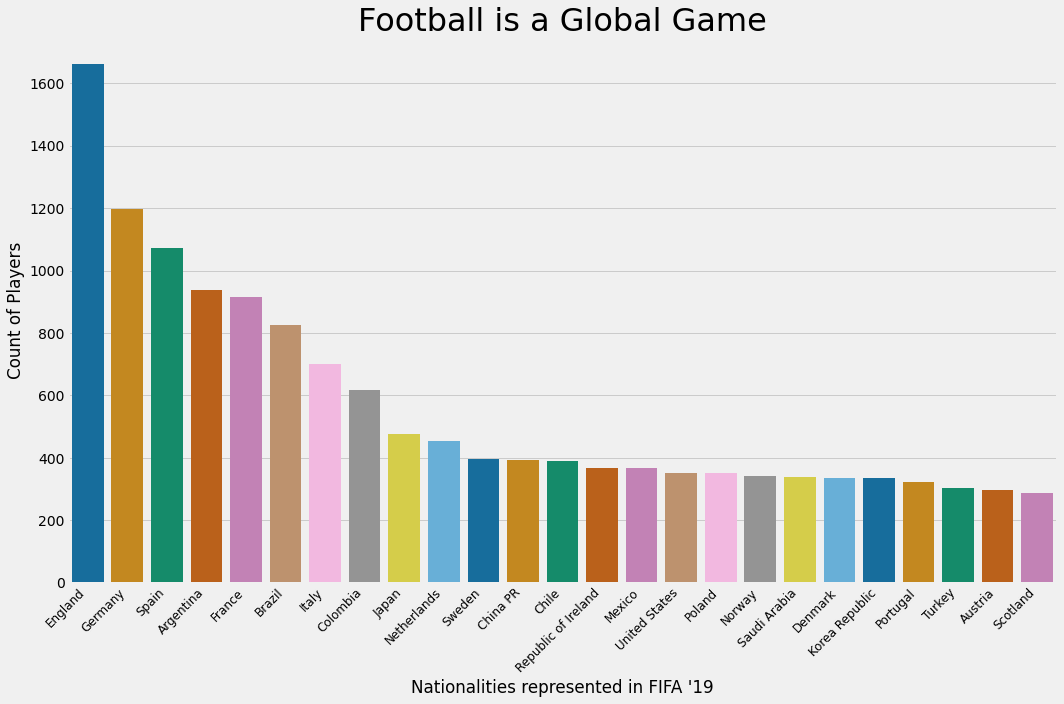

In [21]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x='nationality', 
                   data=players, 
                   order=players.nationality.value_counts().iloc[:25].index, 
                   palette='colorblind')
ax.set_xlabel("Nationalities represented in FIFA '19")
ax.set_ylabel('Count of Players')
ax.set_title('Football is a Global Game', fontsize=32)
ax.set_xticklabels(labels=players.nationality.value_counts().iloc[:25].index, 
                   rotation=45, 
                   fontsize=12, 
                   ha='right')
plt.tight_layout()
plt.savefig('nationality_countplot.png');

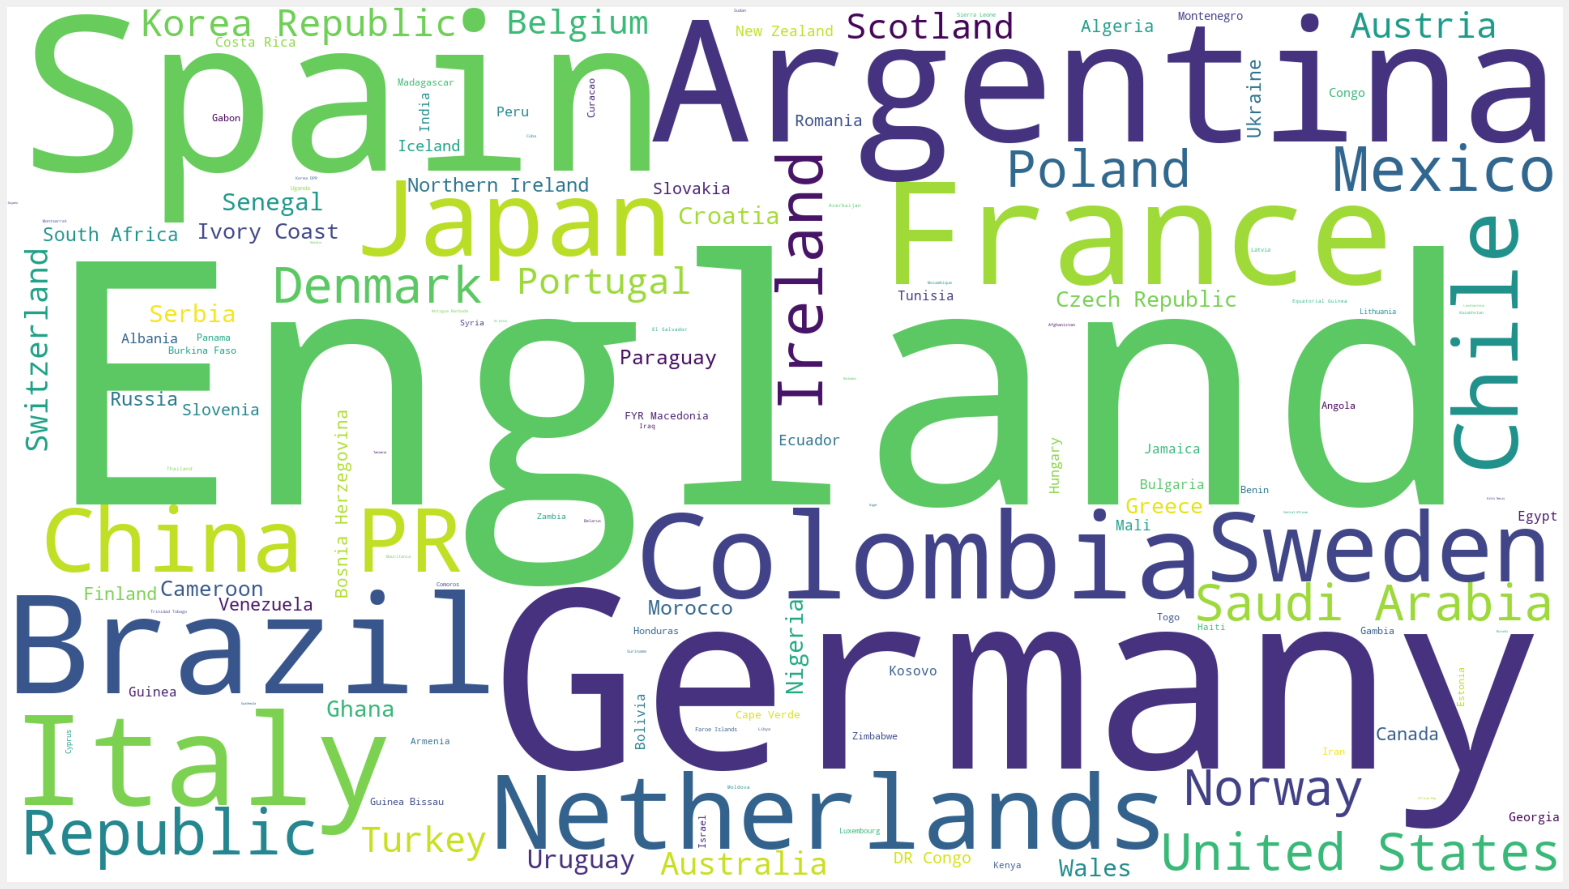

In [22]:
plt.figure(figsize=(25, 15))
wordcloud = WordCloud(background_color='white',
                      width = 1920,
                      height = 1080,
                     ).generate(' '.join(players['nationality']))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('nationality_wordcloud.png')
plt.show()

COOL! Even without the countplot above, a simple glance at the wordcloud tells a lot about where FIFA '19 players come from.

Let's see where the Top 20 players by `Overall` ability score come from:

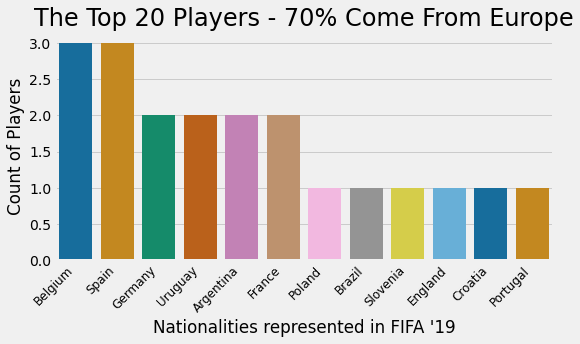

In [23]:
top_twenty_players = players.loc[:19]
top_twenty_players

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='nationality', 
                   data=top_twenty_players, 
                   order=top_twenty_players.nationality.value_counts().iloc[:19].index, 
                   palette='colorblind')
ax.set_xlabel("Nationalities represented in FIFA '19")
ax.set_ylabel('Count of Players')
ax.set_title('The Top 20 Players - 70% Come From Europe', fontsize=24)
ax.set_xticklabels(labels=top_twenty_players.nationality.value_counts().iloc[:19].index, 
                   rotation=45, 
                   fontsize=12, 
                   ha='right')
plt.tight_layout()
plt.savefig('countries_with_top_players.png');

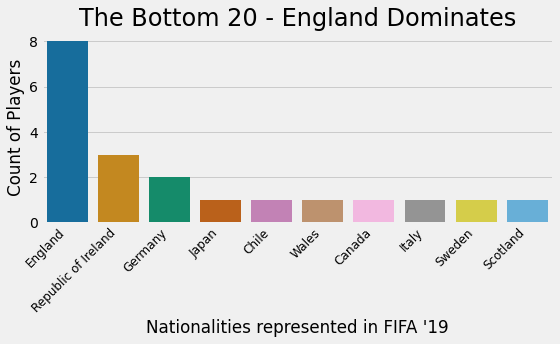

In [24]:
worst_twenty_players = players.tail(20)
worst_twenty_players

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='nationality', 
                   data=worst_twenty_players, 
                   order=worst_twenty_players.nationality.value_counts().iloc[:19].index, 
                   palette='colorblind')
ax.set_xlabel("Nationalities represented in FIFA '19")
ax.set_ylabel('Count of Players')
ax.set_title('The Bottom 20 - England Dominates', fontsize=24)
ax.set_xticklabels(labels=worst_twenty_players.nationality.value_counts().iloc[:19].index, 
                   rotation=45, 
                   fontsize=12, 
                   ha='right')
plt.tight_layout()
plt.savefig('countries_with_worst_players.png');


## III. Visualize It - Positions

Let's have a look at the distribution of positions across the data. We'll start with an ordered distribution of positions by player count, and then look at general positions and the positions of the top 100 players in the set.

What I think we'll see:
 - Soccer is all about scoring more goals than the opposing team. Teams are going to stack rosters with attacking players as opposed to defensive players.

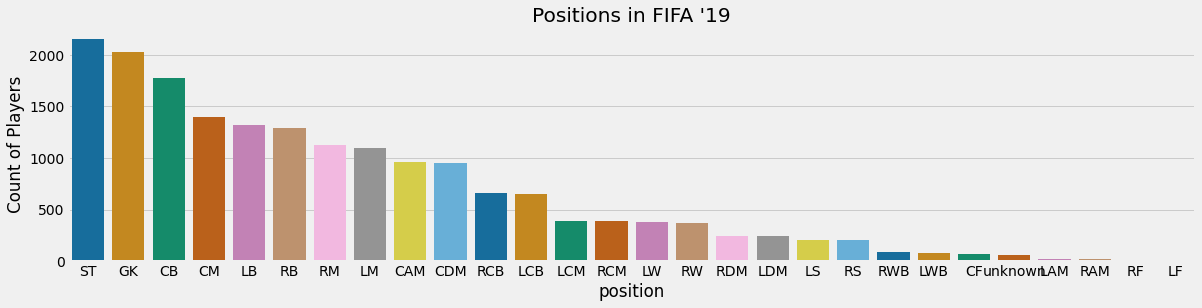

In [25]:
plt.figure(figsize=(18,4))

ax = sns.countplot('position', data=players, palette='colorblind',
                   order = players.position.value_counts().index)
ax.set(title = "Positions in FIFA '19",
       ylabel = 'Count of Players')

plt.savefig('positions_countplot.png');


Wow! Goalkeepers rank second in total positions in FIFA?! That isn't entirely surprising, given that it is the only position on the field that cannot be subdivided into a different role, e.g. midfielders playing CAM, LCM, or RDM.

Let's look at the positions grouped into larger general positions: Attacking, Defensive, Midfield, and Goalkeeper.

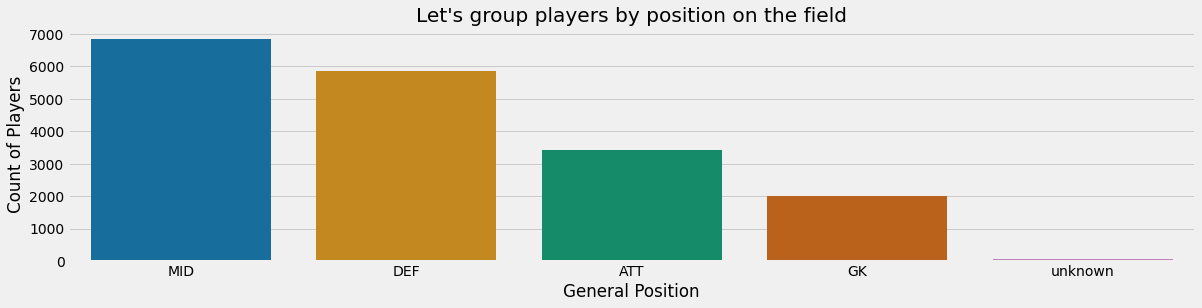

In [26]:
plt.figure(figsize=(18,4))

ax = sns.countplot('General Position', data=players, palette='colorblind',
                   order = players['General Position'].value_counts().index)
ax.set(title = "Let's group players by position on the field",
       ylabel = 'Count of Players')

plt.savefig('position_groupings.png');


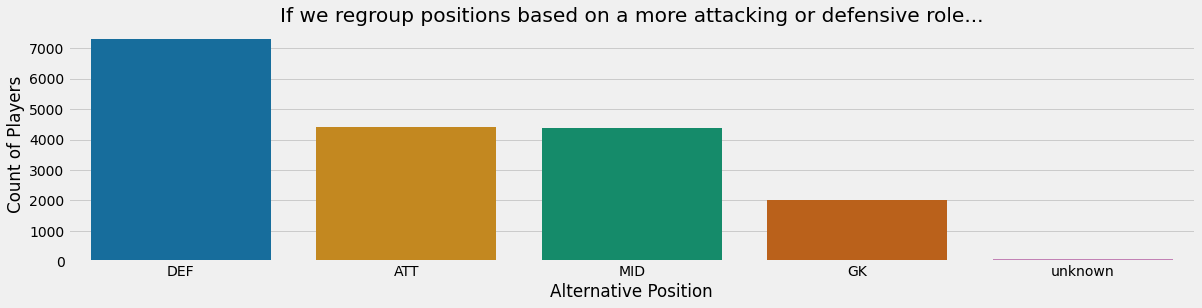

In [27]:
plt.figure(figsize=(18,4))

ax = sns.countplot('Alternative Position', data=players, palette='colorblind',
                   order = players['Alternative Position'].value_counts().index)
ax.set(title = "If we regroup positions based on a more attacking or defensive role...",
       ylabel = 'Count of Players')

plt.savefig('positions_alt_groupings.png');


Look at the difference! Sure, there are loads of strikers and goalkeepers, individual roles on the pitch; but when we group positions into groups based on role and field position, we can see more clearly how team rosters in FIFA prioritize their midfield and defensive players.

The key to good offense is a good defense, right?

## IV. Visualize It - Player Value & Wage

I want to see how positively correlated a player's transfer value and wages are with their Overall Score. Here are a couple of scatter plots to help illustrate.

In [28]:
players.to_csv('player_data.csv')

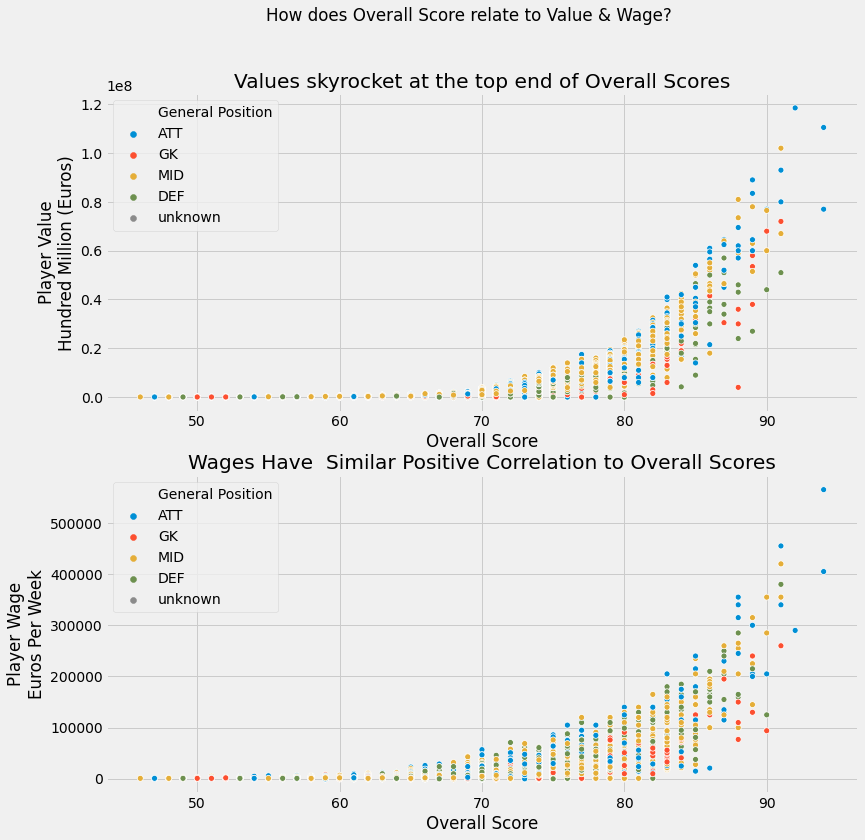

In [45]:
fig, axes = plt.subplots(2, figsize=(12, 12))
fig.suptitle('How does Overall Score relate to Value & Wage?')

sns.scatterplot(ax=axes[0],
               x='overall',
               y='value',
               data=players,
               hue='General Position')
axes[0].set(title = 'Values skyrocket at the top end of Overall Scores',
           xlabel = 'Overall Score',
           ylabel = 'Player Value\nHundred Million (Euros)');
sns.scatterplot(ax=axes[1],
               x='overall',
               y='wage',
               data=players,
               hue='General Position')
axes[1].set(title = 'Wages Have  Similar Positive Correlation to Overall Scores',
           xlabel = 'Overall Score',
           ylabel = 'Player Wage\nEuros Per Week');




plt.savefig('values_wages.png');


Really interesting! We see that, at least in the FIFA '19 system, once players hit an overall score of 70, their `value` and `wage` start to take off! 


Just for fun, let's see which how the top few players stack up in terms of transfer value and wage per week:

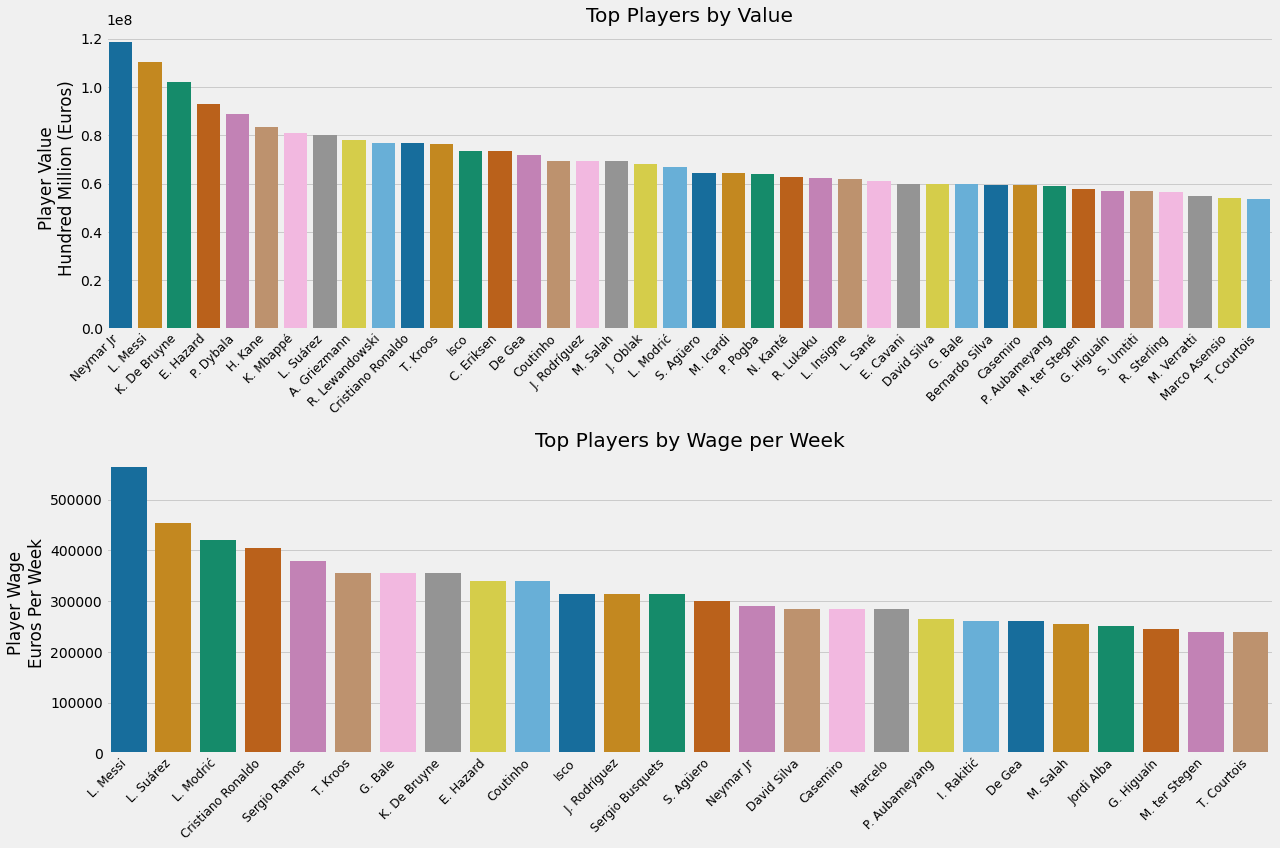

In [30]:
players_value = players.sort_values(by='value', ascending=False)
players_wage = players.sort_values(by='wage', ascending=False)

top_twenty_value = players_value.loc[:19]
top_twenty_wage = players_wage.loc[:19]

fig, axes = plt.subplots(2, figsize=(18, 12))
sns.barplot(ax=axes[0],
               x='name',
               y='value',
               data=top_twenty_value,
               palette='colorblind')
axes[0].set(title = 'Top Players by Value',
            xlabel = '',
            ylabel = 'Player Value\nHundred Million (Euros)')

axes[0].set_xticklabels(labels=top_twenty_value.name, 
                   rotation=45, 
                   fontsize=12, 
                   ha='right')
sns.barplot(ax=axes[1],
               x='name',
               y='wage',
               data=top_twenty_wage,
               palette='colorblind')
axes[1].set(title = 'Top Players by Wage per Week',
            xlabel = '',
            ylabel = 'Player Wage\nEuros Per Week')

axes[1].set_xticklabels(labels=top_twenty_wage.name, 
                   rotation=45, 
                   fontsize=12, 
                   ha='right')

plt.tight_layout();


plt.savefig('top_players_value_wage.png');


__WOW!!__ Someone talk to Neymar's agent. He is top of the pack in value, at around **120 MILLION EUROS** but he's near the middle of the top wage earners, and earns less than half of what Leo Messi earns per week.

Still...300 Thousand a week?? Not bad at all...

## V. YNWA - Liverpool Players
I am a massive Liverpool fan, and if I was selecting a team in FIFA '19, I'd certainly try to pick up as many of the team as I can! Let's see how they stack up

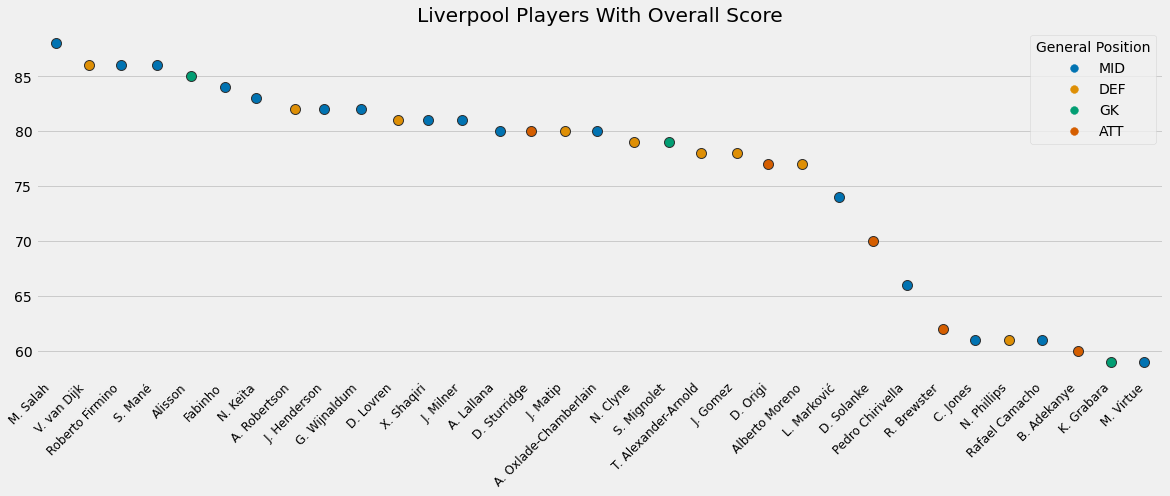

In [31]:
liverpool = players[players.club == 'Liverpool'].sort_values(by='overall', ascending=False)

plt.figure(figsize=(18, 6))
ax = sns.stripplot(x='name', y='overall', 
                   hue='General Position', 
                   data=liverpool, 
                   palette='colorblind',
                   linewidth=1,
                   size=10
                  )

ax.set(title='Liverpool Players With Overall Score',
       xlabel='',
       ylabel='')

ax.set_xticklabels(labels=liverpool.name, 
                   rotation=45, 
                   fontsize=12, 
                   ha='right');

plt.savefig('liverpool.png');


Most of the players here are part of a squad that will win the Champions League one season and the Premier League title the next!

## VI. American Players
Finally, let's have a look at players from the US to see how they stack up with overall scores. There are more young Americans playing in overseas than ever before. What does FIFA '19 think of them??

There are a good few Americans in the dataset, over 300 of them, so we'll look at the top 20 by overall score and then look at the full set by overall score and value.

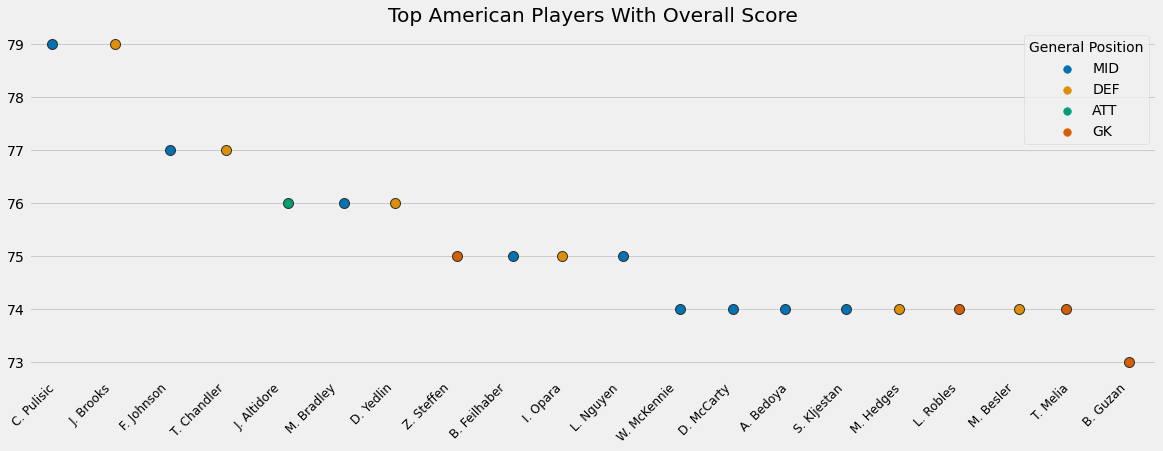

In [42]:
usa = players[players.nationality == 'United States'].sort_values(by='overall', ascending=False)
usa_twenty = usa.head(20)


plt.figure(figsize=(18, 6))
ax = sns.stripplot(x ='name', y ='overall', 
                   hue ='General Position', 
                   data = usa_twenty, 
                   palette ='colorblind',
                   linewidth =1,
                   size = 10
                  )

ax.set(title ='Top American Players With Overall Score',
       xlabel ='',
       ylabel ='')

ax.set_xticklabels(labels = usa_twenty.name, 
                   rotation = 45, 
                   fontsize = 12, 
                   ha = 'right');

plt.savefig('america.png');



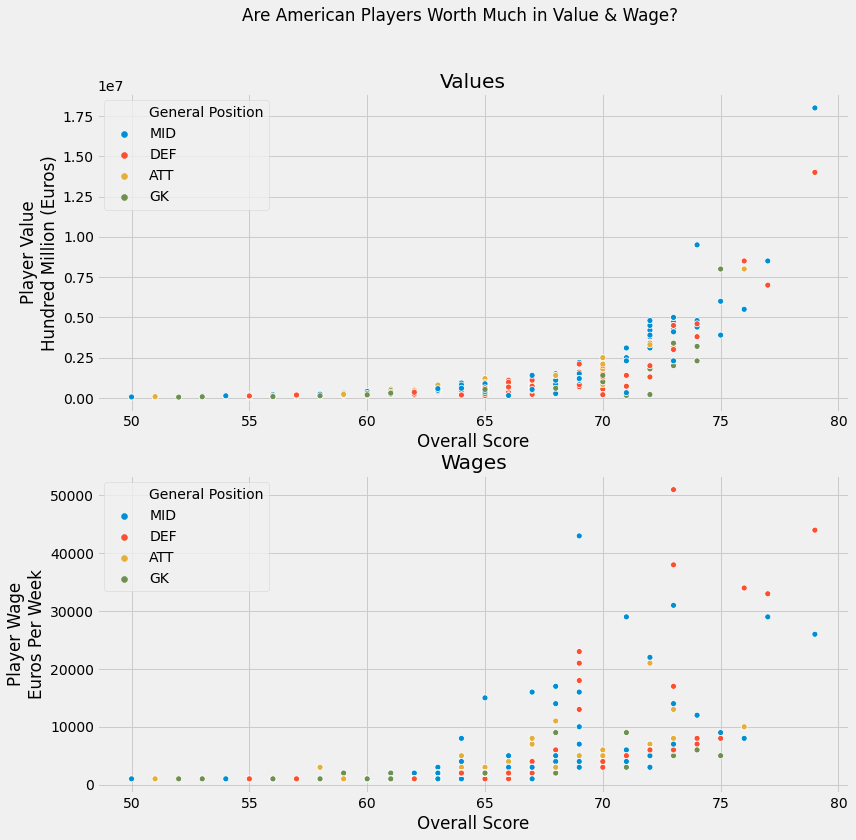

In [46]:
fig, axes = plt.subplots(2, figsize=(12, 12))
fig.suptitle('Are American Players Worth Much in Value & Wage?')

sns.scatterplot(ax=axes[0],
               x='overall',
               y='value',
               data=usa,
               hue='General Position')
axes[0].set(title = 'Values',
           xlabel = 'Overall Score',
           ylabel = 'Player Value\nHundred Million (Euros)');
sns.scatterplot(ax=axes[1],
               x='overall',
               y='wage',
               data=usa,
               hue='General Position')
axes[1].set(title = 'Wages',
           xlabel = 'Overall Score',
           ylabel = 'Player Wage\nEuros Per Week');




plt.savefig('values_wages_america.png');


Interesting! We see the same strong `Overall Score` and `Value` relationship that we see with the general player population, but it kicks in even lower on the overall score range, around the mid-low 60s. Similarly, we see the relationship with wages that we saw with the general player population, but it's a bit more scattered amongst American players. I would bet that this has something to do with the fast rise in number of players playing overseas, and that it will take some time before wages and overall score start to look closer to value and overall score.

### CONCLUSION:
I did this project largely to learn about how to work with data and plots. I also learned that plotting can be a bit time consuming! I think next time I'll build some functions that bang out a few plots right away, or maybe mess with the backend settings of pyplot and seaborn so that I don't have to use code for each plot.

Anyway, thanks for following along!